# **Task 3: Real-time Object Detection Using Yolo**

https://colab.research.google.com/drive/14uNm3vUd0hGVQUcNCOJD1-Qx8M_75eaK?usp=sharing

In [ ]:
!pip install -q ultralytics==8.1.22 opencv-python-headless>=4.9.0.80

In [ ]:
!pip install numpy==1.26.4
!pip install --upgrade --force-reinstall ultralytics opencv-python


  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible

  Using cached ultralytics-8.3.206-py3-none-any.whl.metadata (37 kB)
  Using cached opencv_python-4.12.0.88-cp37-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (19 kB)
  Using cached numpy-2.3.3-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cached matplotlib-3.10.6-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached pillow-11.3.0-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (9.0 kB)
^C


In [ ]:
!pip install --upgrade --force-reinstall ultralytics

  Using cached ultralytics-8.3.206-py3-none-any.whl.metadata (37 kB)
  Using cached numpy-2.3.3-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cached matplotlib-3.10.6-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached opencv_python-4.12.0.88-cp37-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (19 kB)
  Using cached pillow-11.3.0-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (9.0 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.3/112.3 kB 7.6 MB/s eta 0:00:00
  Using cached numpy-2.2.6-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 130.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 11.4 MB/s eta 0:00:00


Import Libraries

In [ ]:
from ultralytics import YOLO
import cv2
from IPython.display import display, HTML
from google.colab import files
import numpy as np
from PIL import Image
import glob, os, time

Load Model

In [ ]:
model = YOLO("yolov8n.pt")  #  For higher accuracy use yolov8s/yolov8m
print("Model loaded.")


Model loaded.


Run detection on an uploaded image

Saving traf.jpg to traf (1).jpg

image 1/1 /content/traf (1).jpg: 448x640 38 cars, 75.6ms
Speed: 14.7ms preprocess, 75.6ms inference, 351.9ms postprocess per image at shape (1, 3, 448, 640)


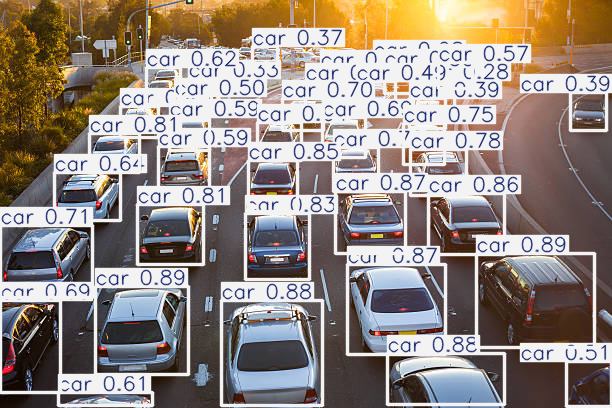

In [ ]:
# Upload an image
uploaded = files.upload()  # use the upload widget
img_path = list(uploaded.keys())[0]

# Run inference
results = model.predict(source=img_path, conf=0.25, imgsz=640)

# Visualize the annotated image inline
annotated = results[0].plot()  # returns numpy BGR image with boxes
display(Image.fromarray(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)))


Run detection on an uploaded video

In [ ]:
# Upload a video file (or supply a path)
uploaded = files.upload()
video_path = list(uploaded.keys())[0]

# Run inference and save annotated video to runs/detect/exp...
# save=True makes ultralytics write annotated video
results = model.predict(source=video_path, conf=0.25, imgsz=640, save=True)

# Find the saved annotated video
out_videos = sorted(glob.glob("runs/detect/*/*.mp4"))

if len(out_videos) > 0:
    print("Annotated videos found:", out_videos[-1])
    out_video = out_videos[-1]

    # Display in notebook
    display(HTML(f'<video width="640" controls><source src="{out_video}" type="video/mp4"></video>'))
else:
    print("No annotated video found in runs/detect. Please check the output of the previous cell for details.")

Saving traffic.mp4 to traffic.mp4

WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/600) /content/traffic.mp4: 384x640 19 persons, 19 cars, 3 motorcycles, 2 buss, 43.9ms
video 1/1 (frame 2/600) /content/traffic.mp4: 384x640 20 persons, 19 cars, 2 motorcycles, 2 buss, 6.5ms
video 1/1 (frame 3/600) /content/traffic.mp4: 384x640 17 persons, 19 cars, 2 motorcycles, 2 buss, 8.5ms
video 1/1 (frame 4/600) /content/traffic.mp4: 384x640 21 persons, 21 cars, 1 motorcycle, 2 buss, 7.8ms
video 

Pseudo-real-time webcam snapshots

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
from PIL import Image

def take_photo(filename='photo.jpg', quality=0.8):
    # Show capture widget
    display(Javascript('''
        async function takePhoto() {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = '📸 Capture';
            document.body.appendChild(div);
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            div.appendChild(video);

            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            video.srcObject = stream;
            await video.play();

            // Wait for button press
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);

            stream.getTracks().forEach(track => track.stop());
            const dataUrl = canvas.toDataURL('image/jpeg', %f);
            div.remove();

            return dataUrl;
        }
        takePhoto();
    ''' % quality))

    # Get photo from JS
    data = eval_js("takePhoto()")
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename


In [ ]:
# Capture photo
img_file = take_photo('snap.jpg')
print("Saved:", img_file)

# Run YOLO on captured image
results = model.predict(source=img_file, conf=0.25, imgsz=640)

# Show annotated result
import cv2
annotated = results[0].plot()
display(Image.fromarray(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)))


<IPython.core.display.Javascript object>

Saved: snap.jpg

image 1/1 /content/snap.jpg: 480x640 1 person, 1 hot dog, 46.7ms
Speed: 2.0ms preprocess, 46.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Measure FPS on a video

In [ ]:
# Quick FPS measurement by processing frames locally with OpenCV + model (frame-by-frame)
import time
cap = cv2.VideoCapture(video_path)  # from previous upload
frame_count = 0
t0 = time.time()

while True:
    ret, frame = cap.read()
    if not ret:
        break
    # run single-frame inference (you might want to reduce imgsz/conf for speed)
    results = model.predict(frame, conf=0.35, imgsz=640)  # frame is numpy array
    frame_count += 1
    if frame_count >= 100:  # measure over 100 frames or until video ends
        break

t1 = time.time()
cap.release()
print(f"Processed {frame_count} frames in {t1-t0:.2f}s ≈ {frame_count/(t1-t0):.2f} FPS")



0: 384x640 12 cars, 10.0ms
Speed: 2.8ms preprocess, 10.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 cars, 8.6ms
Speed: 3.7ms preprocess, 8.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 cars, 8.3ms
Speed: 4.1ms preprocess, 8.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 cars, 8.6ms
Speed: 2.7ms preprocess, 8.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 cars, 7.7ms
Speed: 3.7ms preprocess, 7.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 cars, 9.4ms
Speed: 3.2ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 cars, 6.5ms
Speed: 5.1ms preprocess, 6.5ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 cars, 9.0ms
Speed: 2.7ms preprocess, 9.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13

**Summary of Task 3: Real-time Object Detection Using Yolo**

This section demonstrates how to perform object detection using the YOLO model. It covers:

1.  Installing necessary libraries (`ultralytics`, `opencv-python-headless`).
2.  Loading a pre-trained YOLO model (`yolov8n.pt`).
3.  Running object detection on uploaded images and videos.
4.  Implementing a function to capture pseudo-real-time webcam snapshots and perform detection on them.
5.  Measuring the inference speed (FPS) of the model on a video.

**Task 4: Facial Emotion Recognition**

In [ ]:
!pip install tensorflow keras numpy matplotlib opencv-python


Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import os

Dataset Loading

In [ ]:
import zipfile

zip_path = "/content/drive/MyDrive/FER 2013.zip"
extract_path = "/content/FER2013"

# Unzip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Confirm folder structure
os.listdir(extract_path)

['train', 'test']

Preprocess Image

In [ ]:
train_dir = '/content/FER2013/train'
test_dir  = '/content/FER2013/test'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical'
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


Build VGG19 Model

In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the VGG19 model without the top classification layer
# and with grayscale input (by specifying input_shape)
vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Convert grayscale input to 3 channels by repeating the channel 3 times
# This is a common workaround when using pre-trained models expecting RGB input with grayscale images.
def grayscale_to_rgb(x):
    return tf.image.grayscale_to_rgb(x)

input_tensor = Input(shape=(48, 48, 1))
rgb_input = tf.keras.layers.Lambda(grayscale_to_rgb)(input_tensor)

# Use the VGG19 model as a base
x = vgg19(rgb_input)

# Add custom classification layers
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
output_tensor = Dense(7, activation='softmax')(x) # 7 classes for emotions

# Create the new model
model = Model(inputs=input_tensor, outputs=output_tensor)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda (Lambda)                 │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg19 (Functional)              │ (None, 1, 1, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,292,679 (77.41 MB)

 Trainable params: 20,291,655 (77.41 MB)

 Non-trainable params: 1,024 (4.00 KB)

Train the Model

In [ ]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=55,
    verbose=1
)

Epoch 1/55


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


449/449 ━━━━━━━━━━━━━━━━━━━━ 77s 138ms/step - accuracy: 0.2077 - loss: 2.1453 - val_accuracy: 0.2966 - val_loss: 2.6696
Epoch 2/55
449/449 ━━━━━━━━━━━━━━━━━━━━ 54s 119ms/step - accuracy: 0.4113 - loss: 1.5460 - val_accuracy: 0.4241 - val_loss: 2.2683
Epoch 3/55
449/449 ━━━━━━━━━━━━━━━━━━━━ 53s 118ms/step - accuracy: 0.4770 - loss: 1.3728 - val_accuracy: 0.3983 - val_loss: 1.7065
Epoch 4/55
449/449 ━━━━━━━━━━━━━━━━━━━━ 55s 123ms/step - accuracy: 0.5176 - loss: 1.2773 - val_accuracy: 0.4894 - val_loss: 1.5341
Epoch 5/55
449/449 ━━━━━━━━━━━━━━━━━━━━ 54s 119ms/step - accuracy: 0.5433 - loss: 1.2111 - val_accuracy: 0.5017 - val_loss: 2.0054
Epoch 6/55
449/449 ━━━━━━━━━━━━━━━━━━━━ 53s 119ms/step - accuracy: 0.5548 - loss: 1.1841 - val_accuracy: 0.5404 - val_loss: 1.3466
Epoch 7/55
449/449 ━━━━━━━━━━━━━━━━━━━━ 53s 118ms/step - accuracy: 0.5758 - loss: 1.1386 - val_accuracy: 0.3417 - val_loss: 2.1951
Epoch 8/55
449/449 ━━━━━━━━━━━━━━━━━━━━ 53s 118ms/step - accuracy: 0.5799 - loss: 1.1156 - val

Evaluate Performance

113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.6052 - loss: 1.5372
Test Accuracy: 60.60%


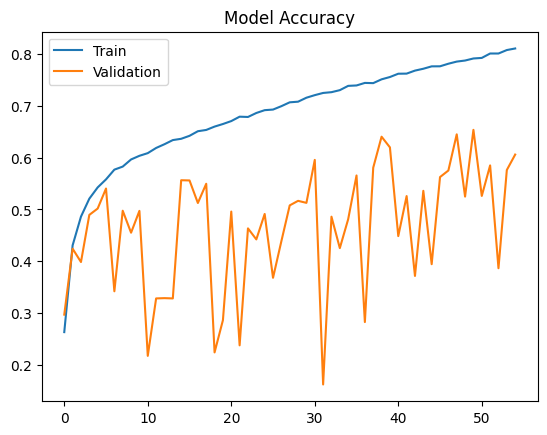

In [ ]:
loss, acc = model.evaluate(test_generator)
print(f"Test Accuracy: {acc*100:.2f}%")

plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.legend()
plt.show()


In [ ]:
model.save("fer2013_image_model.h5")
print("Model saved successfully in h5 format!")

Model saved successfully in h5 format!


**Summary of Task 4: Facial Emotion Recognition**

This section focuses on building and training a deep learning model for facial emotion recognition using the FER2013 dataset. Key steps include:

1.  Loading and preprocessing the dataset.
2.  Building a VGG19-based convolutional neural network (CNN) model.
3.  Training the model on the training data.
4.  Evaluating the model's performance on the test data.